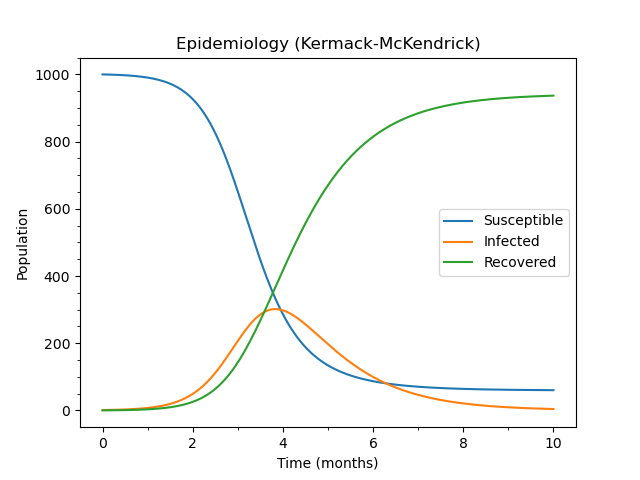

In [1]:
# epidemiology_sir.ipynb
# Cell 1

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from scipy.integrate import solve_ivp


def model(time, state_vector, beta, delta):
    s, i, r = state_vector
    d_s = -beta * s * i
    d_i = beta * s * i - delta * i
    d_r = delta * i
    return d_s, d_i, d_r


def plot(ax):
    # Kermack-McKendrick Parameters
    beta = 0.003  # Infection rate
    delta = 1.0  # Recovery rate

    # Set initial conditions
    s_initial = 1000  # Susceptible people
    i_initial = 1  # Infected people
    r_initial = 0  # Recovered people

    # Set model duration (months)
    time_initial = 0
    time_final = 10

    # Estimate model behavior
    sol = solve_ivp(
        model,
        (time_initial, time_final),
        [s_initial, i_initial, r_initial],
        max_step=0.01,
        args=[beta, delta],
    )
    time_steps = sol.t
    s, i, r = sol.y

    ax.plot(time_steps, s, label="Susceptible")
    ax.plot(time_steps, i, label="Infected")
    ax.plot(time_steps, r, label="Recovered")

    ax.set_title("Epidemiology (Kermack-McKendrick)")
    ax.set_xlabel("Time (months)")
    ax.set_ylabel("Population")

    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.legend()


def main():
    plt.close("all")
    fig = plt.figure(label=" ")
    gs = fig.add_gridspec(1, 1)
    ax = fig.add_subplot(gs[0, 0])
    plot(ax)
    plt.show()


main()